In [62]:
from sklearn import tree
import tensorflow as tf
from keras.models import Sequential
import keras.layers
from keras.optimizers import Adam,RMSprop
import numpy as np
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import glob
from skimage import color
from skimage import io
from skimage.filters import threshold_otsu
from keras.models import model_from_yaml
import keras
from joblib import dump, load
from skimage.transform import resize
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

In [50]:
yaml_file = open('encoderc.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("encoderc.h5")
print("Loaded model from disk")

Loaded model from disk


In [51]:
X_train_d = np.zeros((800, 32, 32, 6))
Y_train_d = np.zeros((800, 1))
for i in range(1, 401):
    image = f"data_train_annotation/negative_L/img_negative_L_{i}.jpg"
    img = resize(io.imread(image), (32,32))
    x1 = loaded_model(img.reshape(1,32,32,3))
    X_train_d[(i-1) * 2, :, :, 0:3] = img
    X_train_d[(i-1) * 2, :, :, 3:6] = x1[0]


    image = f"data_train_annotation/positive_L/img_positive_L_{i}.jpg"
    img = resize(io.imread(image), (32,32))
    x1 = loaded_model(img.reshape(1,32,32,3))
    X_train_d[((i-1) * 2) + 1, :, :, 0:3] = img
    X_train_d[((i-1) * 2) + 1, :, :, 3:6] = x1[0]
    Y_train_d[((i-1) * 2) + 1] = 1

In [52]:
X_vali_d = np.zeros((800, 32, 32, 6))
Y_vali_d = np.zeros((800, 1))
for i in range(1, 401):
    image = f"data_vali_annotation/negative_L/img_negative_L_{i}.jpg"
    img = resize(io.imread(image), (32,32))
    x1 = loaded_model(img.reshape(1,32,32,3))
    X_vali_d[(i-1) * 2, :, :, 0:3] = img
    X_vali_d[(i-1) * 2, :, :, 3:6] = x1[0]


    image = f"data_vali_annotation/positive_L/img_positive_L_{i}.jpg"
    img = resize(io.imread(image), (32,32))
    x1 = loaded_model(img.reshape(1,32,32,3))
    X_vali_d[((i-1) * 2) + 1, :, :, 0:3] = img
    X_vali_d[((i-1) * 2) + 1, :, :, 3:6] = x1[0]
    Y_vali_d[((i-1) * 2) + 1] = 1

In [53]:
X_test_d = np.zeros((800, 32, 32, 6))
Y_test_d = np.zeros((800, 1))
for i in range(1, 401):
    image = f"data_test_annotation/negative_L/img_negative_L_{i}.jpg"
    img = resize(io.imread(image), (32,32))
    x1 = loaded_model(img.reshape(1,32,32,3))
    X_test_d[(i-1) * 2, :, :, 0:3] = img
    X_test_d[(i-1) * 2, :, :, 3:6] = x1[0]


    image = f"data_test_annotation/positive_L/img_positive_L_{i}.jpg"
    img = resize(io.imread(image), (32,32))
    x1 = loaded_model(img.reshape(1,32,32,3))
    X_test_d[((i-1) * 2) + 1, :, :, 0:3] = img
    X_test_d[((i-1) * 2) + 1, :, :, 3:6] = x1[0]
    Y_test_d[((i-1) * 2) + 1] = 1


In [54]:
X_train_d = X_train_d.reshape((800, 32*32*6))
Y_train_d = Y_train_d.reshape(800,)

X_vali_d = X_vali_d.reshape((800, 32*32*6))
Y_vali_d = Y_vali_d.reshape(800, )

X_test_d = X_test_d.reshape((800, 32*32*6))
Y_test_d = Y_test_d.reshape(800, )

In [55]:
X_train_f = np.vstack((X_train_d, X_vali_d))
Y_train_f = np.vstack((Y_train_d, Y_vali_d))

In [48]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train_f, Y_train_f.reshape(1600,))
print("Accuracy: {:.2f}".format(clf.score(X_test_d, Y_test_d)))

ValueError: Found array with dim 4. Estimator expected <= 2.

In [18]:
print("Accuracy on training set: {:.2f}".format(clf.score(X_test_d, Y_test_d)))
dump(clf, 'Vanilla_Decision_Tree.joblib') 

Accuracy on training set: 0.71


['Vanilla_Decision_Tree.joblib']

Tree of depth 1
Tree of depth 2
Tree of depth 3
Tree of depth 4
Tree of depth 5
Tree of depth 6
Tree of depth 7
Tree of depth 8
Tree of depth 9
Tree of depth 10
Tree of depth 11
Tree of depth 12
Tree of depth 13
Tree of depth 14
Tree of depth 15
Tree of depth 16


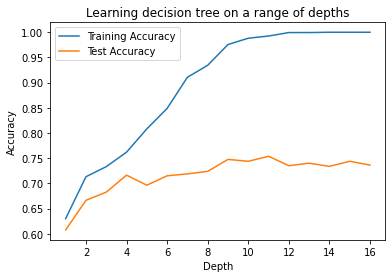

In [26]:
x_axis = []
training_acc = []
test_acc = []

for depth in range(1,17):
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf = clf.fit(X_train_f, Y_train_f.reshape(1600,))

    training_acc.append(clf.score(X_train_f, Y_train_f.reshape(1600,)))
    test_acc.append(clf.score(X_test_d, Y_test_d))
    x_axis.append(depth)
    print(f'Tree of depth {depth}')
            
plt.title(f'Learning decision tree on a range of depths')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(x_axis, training_acc)
plt.plot(x_axis, test_acc)
plt.legend(["Training Accuracy", "Test Accuracy"])

plt.show()


No handles with labels found to put in legend.


[[282 118]
 [101 299]]
0.7170263788968825
0.7475
0.7319461444308445
[0.     0.7475 1.    ]
[0.    0.295 1.   ]


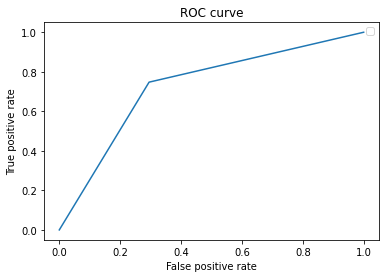

In [37]:
Y_pred_d = clf.predict(X_test_d)

# Confusion Matrix
cm = confusion_matrix(Y_test_d, Y_pred_d)
print(cm)

# Precision
pr = precision_score(Y_test_d, Y_pred_d)
print(pr)

# Recall
pr = recall_score(Y_test_d, Y_pred_d)
print(pr)

# F1 Score 
f1 = f1_score(Y_test_d, Y_pred_d)
print(f1)

fpr, tpr, thresholds= roc_curve(Y_test_d, Y_pred_d)
print(tpr)
print(fpr)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

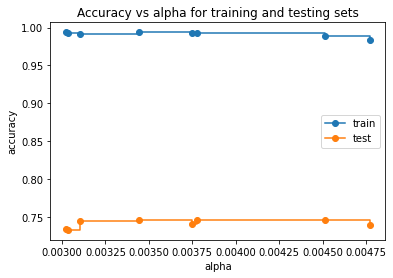

In [58]:
path = clf.cost_complexity_pruning_path(X_train_f, Y_train_f.reshape(1600,))
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas = ccp_alphas[8:16]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha, criterion="entropy")
    clf.fit(X_train_f, Y_train_f.reshape(1600,))
    clfs.append(clf)
    
train_scores = [clf.score(X_train_f, Y_train_f.reshape(1600,)) for clf in clfs]
test_scores = [clf.score(X_test_d, Y_test_d) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

PCA DT

In [38]:
pca = PCA(0.99)
pca.fit(X_train_f)

X_train_PCA = pca.transform(X_train_f)
X_test_PCA = pca.transform(X_test_d)
print(X_train_PCA.shape)

clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train_PCA, Y_train_f.reshape(1600,))
print("Accuracy on training set: {:.2f}".format(clf.score(X_test_PCA, Y_test_d)))

(1600, 474)
Accuracy on training set: 0.63


Random Forest

In [69]:
clf = RandomForestClassifier(max_depth=16, criterion='entropy', random_state=0)
clf.fit(X_train_f, Y_train_f.reshape(1600,))
print(clf.score(X_test_d, Y_test_d))

0.84


In [70]:
dump(clf, 'Random_Forest.joblib') 

['Random_Forest.joblib']

No handles with labels found to put in legend.


[[325  75]
 [ 53 347]]
0.8222748815165877
0.8675
0.8442822384428225
[0.     0.8675 1.    ]
[0.     0.1875 1.    ]


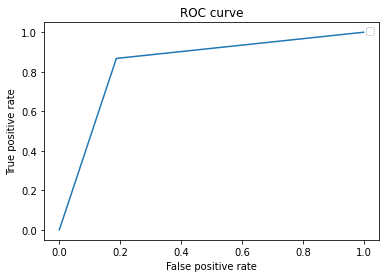

In [65]:
Y_pred_d = clf.predict(X_test_d)

# Confusion Matrix
cm = confusion_matrix(Y_test_d, Y_pred_d)
print(cm)

# Precision
pr = precision_score(Y_test_d, Y_pred_d)
print(pr)

# Recall
pr = recall_score(Y_test_d, Y_pred_d)
print(pr)

# F1 Score 
f1 = f1_score(Y_test_d, Y_pred_d)
print(f1)

fpr, tpr, thresholds= roc_curve(Y_test_d, Y_pred_d)
print(tpr)
print(fpr)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

Random Forest of depth 1
Random Forest of depth 2
Random Forest of depth 3
Random Forest of depth 4
Random Forest of depth 5
Random Forest of depth 6
Random Forest of depth 7
Random Forest of depth 8
Random Forest of depth 9
Random Forest of depth 10
Random Forest of depth 11
Random Forest of depth 12
Random Forest of depth 13
Random Forest of depth 14
Random Forest of depth 15
Random Forest of depth 16


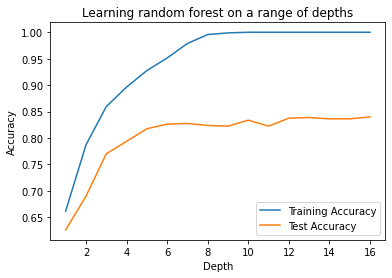

In [68]:
x_axis = []
training_acc = []
test_acc = []

for depth in range(1,17):
    clf = RandomForestClassifier(max_depth=depth, criterion='entropy', random_state=0)
    clf.fit(X_train_f, Y_train_f.reshape(1600,))

    training_acc.append(clf.score(X_train_f, Y_train_f.reshape(1600,)))
    test_acc.append(clf.score(X_test_d, Y_test_d))
    x_axis.append(depth)
    print(f'Random Forest of depth {depth}')
            
plt.title(f'Learning random forest on a range of depths')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(x_axis, training_acc)
plt.plot(x_axis, test_acc)
plt.legend(["Training Accuracy", "Test Accuracy"])

plt.show()